In [ ]:
df = pd.read_csv('./heart.csv')

In [36]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [38]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [39]:
df.duplicated().any()


False

In [40]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


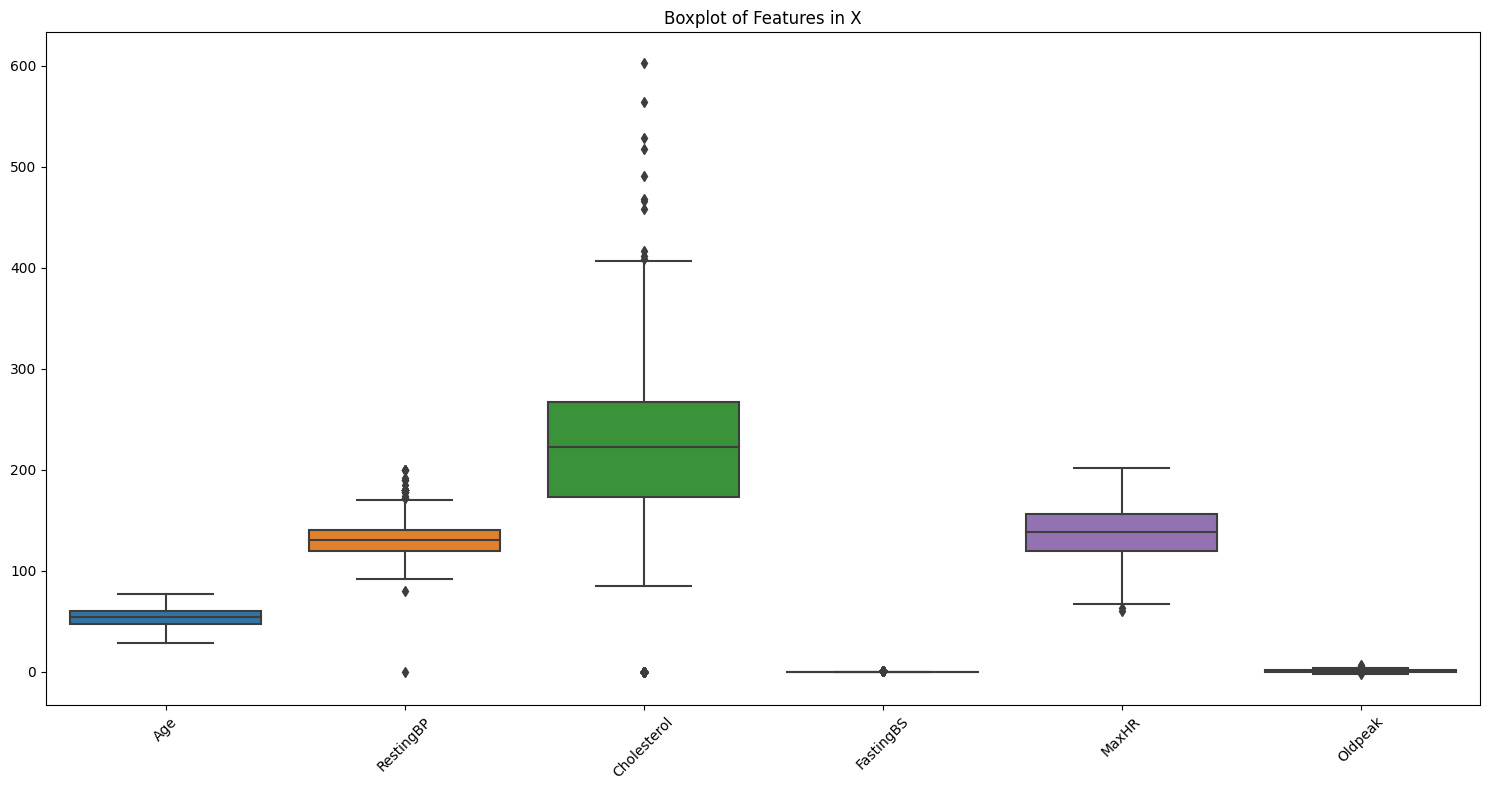

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxplot of Features in X")
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Define columns to exclude (binary or categorical encoded as numbers)
exclude_cols = ['FastingBS']  # Add more if needed

# Select only numeric columns excluding the binary ones
X_numeric = X.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_cols)

# Compute IQR
Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers: True if value is outside the IQR bounds
outlier_mask = (X_numeric < (Q1 - 1.5 * IQR)) | (X_numeric > (Q3 + 1.5 * IQR))

# Identify rows with any outlier
outlier_rows = outlier_mask.any(axis=1)

# Count the number of rows that will be removed
num_removed = outlier_rows.sum()
print(f"Number of datapoints removed: {num_removed}")

# Drop those rows from X and y
X_clean = X[~outlier_rows].copy()
y_clean = y[~outlier_rows].copy()



Number of datapoints removed: 216


In [43]:
# Count of rows remaining in the cleaned data
print(f"Number of rows remaining in X_clean: {len(X_clean)}")
print(f"Number of rows remaining in y_clean: {len(y_clean)}")

Number of rows remaining in X_clean: 702
Number of rows remaining in y_clean: 702


In [44]:
X = X_clean
y = y_clean


In [45]:
X.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [46]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [47]:
# List all unique values in the 'FastingBS' column and their counts
print(X['FastingBS'].value_counts())


FastingBS
0    588
1    114
Name: count, dtype: int64


In [48]:
categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

X_fixed = pd.get_dummies(X, columns=categorical)
X = X_fixed
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [49]:
X['AgeGroup'] = pd.cut(X['Age'], bins=[0, 40, 55, 70, 100], labels=['Young', 'Middle-aged', 'Senior', 'Very old'])
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)


In [50]:
from sklearn import preprocessing
import pandas as pd

# Columns you want to scale
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Initialize scaler
scaler = preprocessing.StandardScaler()

# Fit and transform only selected columns
X_scaled = scaler.fit_transform(X[columns_to_scale])

# Replace the scaled columns back into the original DataFrame
X[columns_to_scale] = X_scaled

print(X)


          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_F  \
0   -1.335169   0.547914     0.973199          0  1.291925 -0.866393  False   
1   -0.390639   1.845825    -1.178909          0  0.634669  0.176309   True   
2   -1.650013  -0.101041     0.854735          0 -1.747885 -0.866393  False   
3   -0.495587   0.418123    -0.507609          0 -1.337100  0.697660   True   
4    0.134100   1.196870    -0.882748          0 -0.762001 -0.866393  False   
..        ...        ...          ...        ...       ...       ...    ...   
913 -0.810430  -1.398952     0.479596          0 -0.351215  0.384849  False   
914  1.603369   0.807496    -0.922236          1  0.018491  2.678793  False   
915  0.448943  -0.101041    -2.146371          0 -1.049550  0.384849  False   
916  0.448943  -0.101041    -0.073239          0  1.374082 -0.866393   True   
917 -1.545065   0.418123    -1.277630          0  1.333004 -0.866393  False   

     Sex_M  ChestPainType_ASY  ChestPainType_ATA  .

In [51]:
import numpy as np

# Compute the correlation of each feature with the target variable 'y'
correlations = X.corrwith(y).abs()

# Select features where correlation is greater than or equal to 0.05
selected_features = correlations[correlations >= 0.05].index.tolist()

# Keep only those features in X
X = X[selected_features]

print(f"Selected features ({len(selected_features)}): {selected_features}")


Selected features (23): ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'AgeGroup_Very old']


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 917
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   702 non-null    float64
 1   RestingBP             702 non-null    float64
 2   Cholesterol           702 non-null    float64
 3   FastingBS             702 non-null    int64  
 4   MaxHR                 702 non-null    float64
 5   Oldpeak               702 non-null    float64
 6   Sex_F                 702 non-null    bool   
 7   Sex_M                 702 non-null    bool   
 8   ChestPainType_ASY     702 non-null    bool   
 9   ChestPainType_ATA     702 non-null    bool   
 10  ChestPainType_NAP     702 non-null    bool   
 11  ChestPainType_TA      702 non-null    bool   
 12  RestingECG_LVH        702 non-null    bool   
 13  RestingECG_Normal     702 non-null    bool   
 14  RestingECG_ST         702 non-null    bool   
 15  ExerciseAngina_N      702 no

# EDA

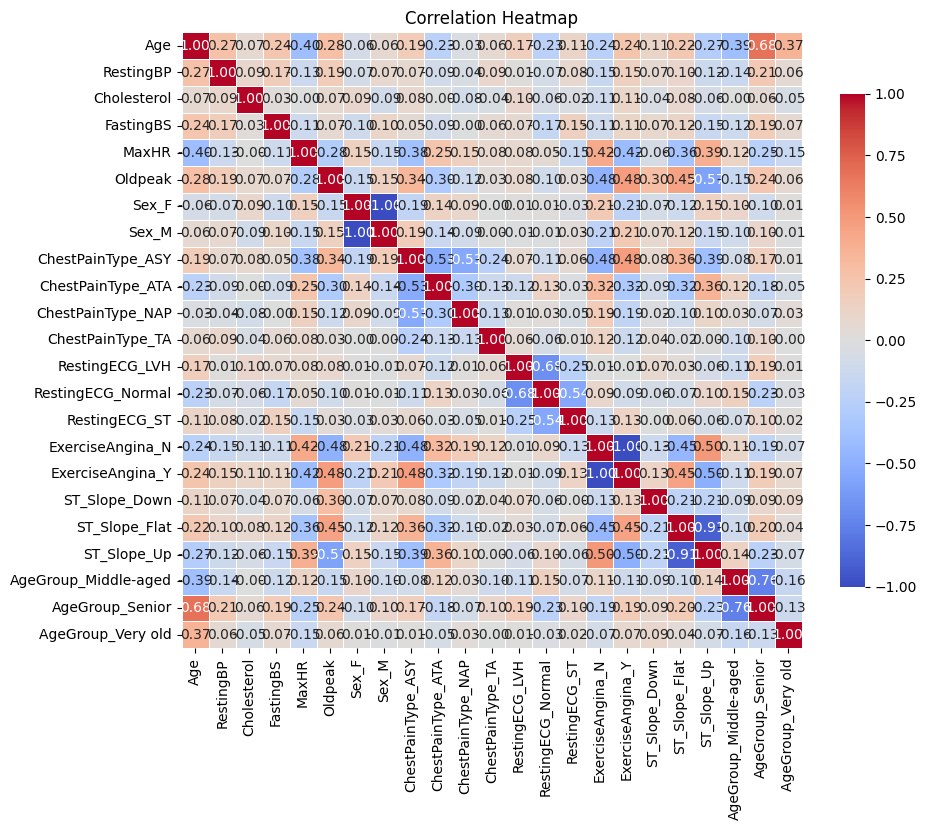

In [53]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [54]:
corr_matrix = X.corr()
print(corr_matrix)


                           Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                   1.000000   0.270860     0.069529   0.238212 -0.402700   
RestingBP             0.270860   1.000000     0.089587   0.174080 -0.128768   
Cholesterol           0.069529   0.089587     1.000000   0.028912 -0.002240   
FastingBS             0.238212   0.174080     0.028912   1.000000 -0.112441   
MaxHR                -0.402700  -0.128768    -0.002240  -0.112441  1.000000   
Oldpeak               0.283476   0.191743     0.071706   0.067966 -0.280452   
Sex_F                -0.064238  -0.074874     0.092209  -0.102131  0.153691   
Sex_M                 0.064238   0.074874    -0.092209   0.102131 -0.153691   
ChestPainType_ASY     0.188593   0.070593     0.084632   0.052449 -0.376791   
ChestPainType_ATA    -0.228281  -0.090378    -0.000101  -0.091916  0.251371   
ChestPainType_NAP    -0.030705  -0.041114    -0.078444  -0.004300  0.151806   
ChestPainType_TA      0.063199   0.087285    -0.0398

In [55]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(data=X_clean, x='Sex')
# plt.title("Countplot of Sex")
# plt.show()


In [56]:
# y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Disease', 'Heart Disease'])
# plt.title("Heart Disease Distribution")
# plt.ylabel("")
# plt.show()


In [57]:
# X_fixed['Age'].plot.hist(bins=20, edgecolor='black')
# plt.title("Age Distribution")
# plt.xlabel("Age")
# plt.show()


In [58]:
# sns.pairplot(X_fixed[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
# plt.suptitle("Pairplot of Selected Features", y=1.02)
# plt.show()


In [59]:
# sns.histplot(X_fixed['Cholesterol'], kde=True, bins=30)
# plt.title("Cholesterol Distribution with KDE")
# plt.xlabel("Cholesterol")
# plt.show()


In [60]:
# sns.stripplot(data=X_clean, x='Sex', y='Age', jitter=True)
# plt.title("Age Distribution by Sex")
# plt.show()


In [61]:
# sns.scatterplot(data=X, x='Age', y='Cholesterol', hue=y)
# plt.title("Age vs Cholesterol (colored by HeartDisease)")
# plt.show()


# Models

In [62]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

## Optuna for KNN

In [63]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [64]:
# import optuna
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# def objective(trial):
#     # Hyperparameters to optimize
#     C = trial.suggest_uniform('C', 100, 120) 
#     gamma = trial.suggest_categorical('gamma', ['auto'])
#     model = SVC(C=C, kernel='rbf', gamma=gamma)
    
#     # Cross validation
#     cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()  


#     return cv_score

# # Optuna study to maximize the validation accuracy
# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# print(f"Best Parameters: {best_params}")

# # Training the SVM model with the best parameters on the full training set
# best_model = SVC(**best_params)
# best_model.fit(X_train, y_train)

# # Test the model 
# y_test_pred = best_model.predict(X_test)


# test_acc = accuracy_score(y_test, y_test_pred)
# test_precision = precision_score(y_test, y_test_pred, average='weighted')  
# test_recall = recall_score(y_test, y_test_pred, average='weighted')
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# # Print results
# print(f"Test Accuracy: {test_acc}")
# print(f"Test Precision: {test_precision}")
# print(f"Test Recall: {test_recall}")
# print(f"Test F1-Score: {test_f1}")

# # You can also print a detailed classification report
# print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


In [65]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier  # or LinearSVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def objective(trial):
    # Hyperparameters to optimize
    C = trial.suggest_uniform('C', 200, 500)  # Increase range for better exploration
    gamma = trial.suggest_loguniform('gamma', 0.001, 0.2)  # Use log-uniform for more granular gamma search
    n_components = trial.suggest_int('n_components', 1000, 1500)  # Broader range for n_components

    # Approximate the RBF kernel
    rbf_feature = RBFSampler(gamma=gamma, n_components=n_components, random_state=42)
    model = make_pipeline(
        rbf_feature,
        SGDClassifier(loss='hinge', alpha=1.0/C, max_iter=1000, tol=1e-3, random_state=42)
    )

    # Cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return cv_score


# Optuna study to maximize the validation accuracy
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Rebuild the best model using the best hyperparameters
rbf_feature = RBFSampler(gamma=best_params['gamma'], n_components=best_params['n_components'], random_state=42)
best_model = make_pipeline(
    rbf_feature,
    SGDClassifier(loss='hinge', alpha=1.0 / best_params['C'], max_iter=1000, tol=1e-3, random_state=42)
)





[I 2025-05-09 06:23:12,312] A new study created in memory with name: no-name-3d9eb46d-d8b1-48c5-a79b-39b0695284c9
/tmp/ipykernel_212/234229396.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  C = trial.suggest_uniform('C', 200, 500)  # Increase range for better exploration
/tmp/ipykernel_212/234229396.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 0.001, 0.2)  # Use log-uniform for more granular gamma search
[I 2025-05-09 06:23:12,463] Trial 0 finished with value: 0.855673198482933 and parameters: {'C': 320.4195293206301, 'gamma': 0.028937625086851125, 'n_components': 1066}. Best is trial 0 with value: 0.855673198482933.
/tmp/ipykernel_

Best Parameters: {'C': 400.7935817191417, 'gamma': 0.028092305159489246, 'n_components': 1288}


In [66]:
best_model.fit(X_train, y_train)


y_test_pred = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')


print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9078
Test Precision: 0.9146
Test Recall: 0.9078
Test F1-Score: 0.9075

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        71
           1       0.86      0.97      0.91        70

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141

